<a href="https://colab.research.google.com/github/chogerlate/Hackathon/blob/main/Week-4-Pre-SuperAIEngineer-NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

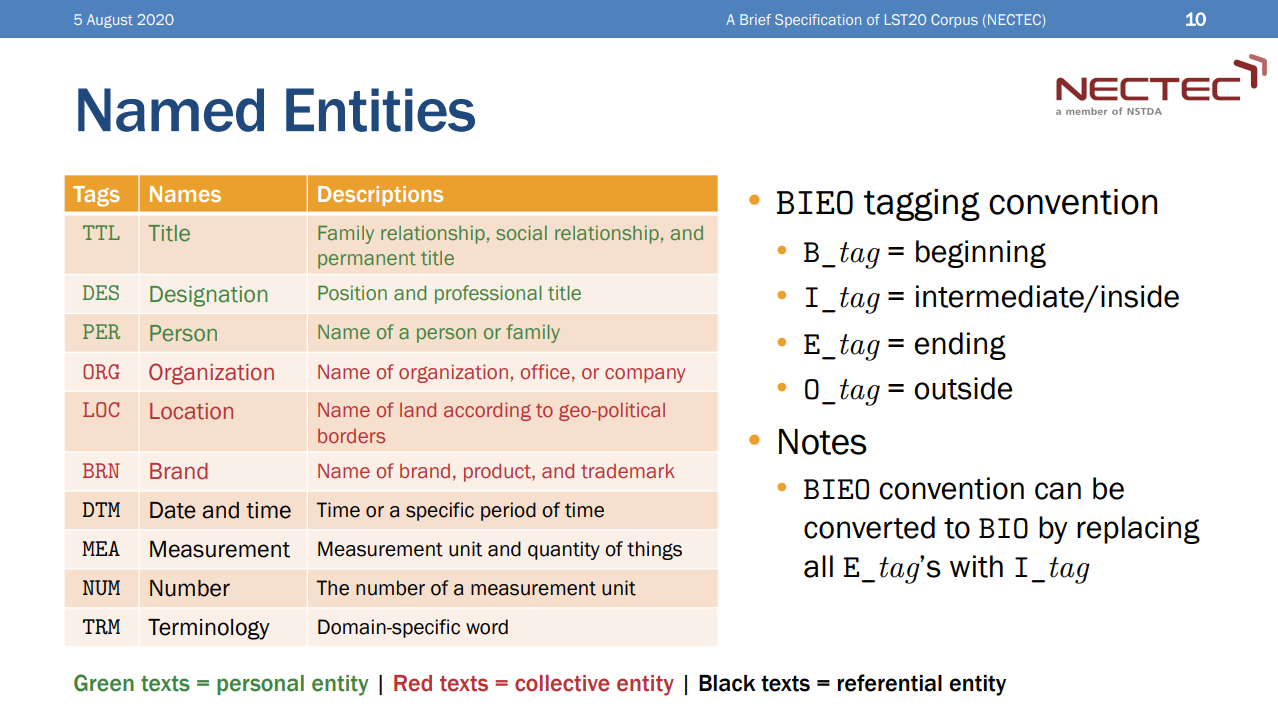

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q simpletransformers
!pip install pythainlp 

     |████████████████████████████████| 250 kB 6.7 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 1.9 MB 51.9 MB/s 
     |████████████████████████████████| 451 kB 67.0 MB/s 
     |████████████████████████████████| 7.6 MB 20.3 MB/s 
     |████████████████████████████████| 1.3 MB 58.1 MB/s 
     |████████████████████████████████| 9.2 MB 53.9 MB/s 
     |████████████████████████████████| 5.5 MB 47.9 MB/s 
     |████████████████████████████████| 182 kB 67.3 MB/s 
     |████████████████████████████████| 168 kB 69.4 MB/s 
     |████████████████████████████████| 182 kB 67.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 166 kB 70.4 MB/s 
     |████████████████████████████████| 166 kB 66.5 MB/s 
     |████████████████████████████████| 162 kB 65.1 MB/s 
     |████████████████████████████████| 162 kB 70.1 MB/s 
     |████████████████████████████████| 158 kB 72.4 MB/s 
     |█████████████

In [ ]:
!cp /content/drive/MyDrive/colab/kaggle.json /content/kaggle.json!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c ss3-hackathon-online-natural-language-processing #download competition dataset

cp: cannot stat '/content/drive/MyDrive/colab/kaggle.json': No such file or directory
cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggl

In [ ]:
import logging
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs
import torch

from datasets import load_dataset

from pythainlp.tokenize import sent_tokenize
from pythainlp.tokenize import clause_tokenize

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs


In [ ]:
#Change File location

!cp /content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.tar.gz /content/AIFORTHAI-LST20Corpus.tar.gz
# !cp /content/drive/MyDrive/colab/hack4/ss3-hackathon-online-natural-language-processing.zip /content/ss3-hackathon-online-natural-language-processing.zip 

cp: cannot stat '/content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.tar.gz': No such file or directory


ผมแตกไฟล์ตัวที่เป็น tr zip ไม่ได้เลยเอาเป้นแปลงเป้น zip เองก่อนแล้วเก็บไว้ใน GDrive แล้วเอามาใช้อีกที

In [ ]:
!cp -R /content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.zip /content/
!unzip /content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.zip -d /content

cp: cannot stat '/content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.zip': No such file or directory
unzip:  cannot find or open /content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.zip, /content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.zip.zip or /content/drive/MyDrive/Data/AIFORTHAI-LST20Corpus.zip.ZIP.


In [ ]:
# !rm -r "/content/content"

#Download dataset

In [ ]:
lst20 = load_dataset("lst20", data_dir="/content/AIFORTHAI-LST20Corpus/LST20_Corpus")

train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [ ]:
train_df.head()

In [ ]:
_NER_TAGS = [
       "O",
        "B_BRN",        "B_DES",        "B_DTM",        "B_LOC",        "B_MEA",        "B_NUM",        "B_ORG",        "B_PER",        "B_TRM",        "B_TTL",
       "I_BRN",        "I_DES",        "I_DTM",        "I_LOC",        "I_MEA",        "I_NUM",        "I_ORG",        "I_PER",        "I_TRM",        "I_TTL",
        "E_BRN",        "E_DES",        "E_DTM",        "E_LOC",        "E_MEA",        "E_NUM",        "E_ORG",        "E_PER",        "E_TRM",        "E_TTL"]

In [ ]:
#Extract Data form Data Loader 
def convert_data_to_df(df):
  data_df = pd.DataFrame()
  sentence_id = []
  words = []
  labels = []

  for sentence in range(len(df)):
    for token in range(len(df['tokens'][sentence])):
      sentence_id.append(sentence)
      words.append(df['tokens'][sentence][token])
      labels.append(_NER_TAGS[df['ner_tags'][sentence][token]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )

In [ ]:
train_data = convert_data_to_df(train_df)
train_data.head()

sentence_id     words labels
0            0  สุรยุทธ์  B_PER
1            0       ยัน      O
2            0    ปฏิเสธ      O
3            0     ลงนาม      O
4            0         _      O

In [ ]:
eval_data = convert_data_to_df(validation_df )

In [ ]:
test_data = convert_data_to_df(test_df)

In [ ]:
#ตาม doc ที่เขียนใน simpleTranformer เลย

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 16 
ner_args.eval_batch_size = 16
ner_args.use_multiprocessing = True 
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 2
ner_args.max_seq_length = 128



model = NERModel(
     "auto", "airesearch/wangchanberta-base-att-spm-uncased", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

Some weights of the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased were not used when initializing CamembertForTokenClassification: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForTokenClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier

In [ ]:
# Train the model
model.train_model(train_data, eval_data=eval_data)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/3957 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/352 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/3957 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/352 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/352 [00:00<?, ?it/s]

(7914,
 defaultdict(list,
             {'global_step': [2000, 3957, 4000, 6000, 7914],
              'train_loss': [0.14149725437164307,
               0.11755472421646118,
               0.10039602965116501,
               0.06266111880540848,
               0.1753406822681427],
              'eval_loss': [0.14751048099291933,
               0.12987054761007047,
               0.13570861349911534,
               0.12728533099685924,
               0.1230654517633163],
              'precision': [0.738292984626259,
               0.7566597225300297,
               0.7588658865886588,
               0.7809532382195419,
               0.7887845403648185],
              'recall': [0.7840487919305653,
               0.8008913910391743,
               0.7910860896082571,
               0.8140745953553835,
               0.8196106028618344],
              'f1_score': [0.7604832654547109,
               0.7781475066095359,
               0.7746410933731481,
               0.7971700280240731,


In [ ]:
# Evaluate the model
result, model_outputs, preds_list = model.eval_model(eval_data)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/352 [00:00<?, ?it/s]

#Test Data Processing

In [ ]:
#Read test file
texts_test_raw = []
f = open('/content/ne_test.txt', "r")
file_data = f.readlines()
for line in file_data:
  line = line.strip().replace(u'\xa0', u'')
  texts_test_raw.append(line)

In [ ]:
print(texts_test_raw)

['นาง', 'สุดารัตน์', '', 'เกยุราพันธ์', '', 'รมว.', 'สาธารณสุข', '', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '', '100', '%', '', 'ว่า', '', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '', '7', '', 'ก.พ.', 'นี้', '', 'ตั้งแต่', '', '16.00', 'น.', 'เป็นต้นไป', '', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '', 'ชินวัตร', 'รัฐมนตรี', '', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '', '16.30', 'น.', '', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '', 'ไก่', 'ทอด', '', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '', 'สุนทรเวช', '', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '', 'และ', 'ม.ล.', 'ศิริเฉลิม', '', 'สวัสดิวัฒน์', '', 'หรือ', 'หมึกแดง', '', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อาหาร', 'เสร็จ', 'จะ', 'ร่วม', 'ร

In [ ]:
#Check word length
len(texts_test_raw)

69562

In [ ]:
#delete last word
texts_test_raw = texts_test_raw[:-1]

In [ ]:
print(texts_test_raw)

['นาง', 'สุดารัตน์', '', 'เกยุราพันธ์', '', 'รมว.', 'สาธารณสุข', '', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '', '100', '%', '', 'ว่า', '', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '', '7', '', 'ก.พ.', 'นี้', '', 'ตั้งแต่', '', '16.00', 'น.', 'เป็นต้นไป', '', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '', 'ชินวัตร', 'รัฐมนตรี', '', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '', '16.30', 'น.', '', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '', 'ไก่', 'ทอด', '', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '', 'สุนทรเวช', '', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '', 'และ', 'ม.ล.', 'ศิริเฉลิม', '', 'สวัสดิวัฒน์', '', 'หรือ', 'หมึกแดง', '', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อาหาร', 'เสร็จ', 'จะ', 'ร่วม', 'ร

In [ ]:
#Replace "" with "_"
def blank_space(x):
  if x == '':
    x = '_'
  return x

In [ ]:
#เปลี่ยนค่าจาก " " เป็น "_" เพื่อให้ตรงตามที่เรา train model ไว้
for i in range(len(texts_test_raw)):
  texts_test_raw[i] = blank_space(texts_test_raw[i])

In [ ]:
#Check result
print(len(texts_test_raw))
print(texts_test_raw)

69561
['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_', '100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '_', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '_', 'สุนทรเวช', '_', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '_', 'และ', 'ม.ล.', 'ศิริเฉลิม', '_', 'สวัสดิวัฒน์', '_', 'หรือ', 'หมึกแดง', '_', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '_', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', '

In [ ]:
# ตัดคำจะได้ predict ได้ไวและแม่นยำขึ้น
my_token = clause_tokenize(texts_test_raw)
print(my_token)

Corpus: lst20-cls
- Downloading: lst20-cls 0.2


  0%|          | 0/3738912 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pythainlp/tokenize/crfcls.py:63: UserWarning: 
    LST20 corpus are free for research and open source only.

    If you want to use in Commercial use, please contract NECTEC.

    https://www.facebook.com/dancearmy/posts/10157641945708284
    
  """)
/usr/local/lib/python3.7/dist-packages/pythainlp/tag/perceptron.py:47: UserWarning: 
    LST20 corpus are free for research and open source only.

    If you want to use in Commercial use, please contract NECTEC.

    https://www.facebook.com/dancearmy/posts/10157641945708284
    
  """


Corpus: pos_lst20_perceptron
- Downloading: pos_lst20_perceptron 0.2.4


  0%|          | 0/9512053 [00:00<?, ?it/s]

[['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_', '100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง'], ['และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '_', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', '_', 'สุนทรเวช', '_', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '_', 'และ', 'ม.ล.', 'ศิริเฉลิม', '_', 'สวัสดิวัฒน์', '_', 'หรือ', 'หมึกแดง', '_', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', '_', 'ภาย'], ['หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อ

In [ ]:
print(my_token[0])

['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_', '100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', '_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง']


In [ ]:
#Check how many sentence
len(my_token)

3648

In [ ]:
my_token

#Prediction Model

In [ ]:
# Test Model
ner_args = NERArgs()
ner_args.train_batch_size = 16 
ner_args.eval_batch_size = 16
ner_args.use_multiprocessing = True 
ner_args.evaluate_during_training = True
ner_args.overwrite_output_dir = True
ner_args.num_train_epochs = 2
ner_args.max_seq_length = 512 

model = NERModel(
     "camembert", "/content/outputs/best_model", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS  # your latest model
)

/usr/local/lib/python3.7/dist-packages/simpletransformers/ner/ner_model.py:420: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.
  "use_multiprocessing automatically disabled as CamemBERT"


In [ ]:
predictions, raw_outputs = model.predict(my_token, False)

  0%|          | 0/3648 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/228 [00:00<?, ?it/s]

In [ ]:
#Create series of result
final_test_df = []
for i in range(len(predictions)):
  for j in range(len(predictions[i])):
    data = predictions[i][j]
    value = data.values()
    final_test_df += value
len(final_test_df)

69561

In [ ]:
print(final_test_df)

['B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'B_DES', 'B_ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_LOC', 'O', 'O', 'O', 'B_MEA', 'E_MEA', 'O', 'O', 'O', 'O', 'O', 'O', 'B_ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'B_LOC', 'O', 'B_DTM', 'I_DTM', 'I_DTM', 'I_DTM', 'I_DTM', 'I_DTM', 'E_DTM', 'E_DTM', 'O', 'B_DTM', 'I_DTM', 'I_DTM', 'E_DTM', 'O', 'O', 'O', 'B_DES', 'B_PER', 'I_PER', 'E_PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_DTM', 'I_DTM', 'I_DTM', 'E_DTM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'B_DES', 'I_DES', 'I_DES', 'B_ORG', 'O', 'O', 'B_TTL', 'B_PER', 'I_PER', 'E_PER', 'O', 'O', 'B_PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

In [ ]:
final_result = pd.DataFrame(final_test_df)
final_result

0
0      B_TTL
1      B_PER
2      I_PER
3      E_PER
4          O
...      ...
69556      O
69557      O
69558      O
69559      O
69560      O

[69561 rows x 1 columns]

#Prepare submission file

In [ ]:
submisstion_df = pd.read_csv('/content/ne_sample_submission.csv')
submisstion_df

Id Predicted
0          1     B_TTL
1          2     B_PER
2          3     I_PER
3          4       NaN
4          5       NaN
...      ...       ...
69556  69557       NaN
69557  69558       NaN
69558  69559       NaN
69559  69560       NaN
69560  69561       NaN

[69561 rows x 2 columns]

In [ ]:
submisstion_df['Predicted'] = final_result
submisstion_df

Id Predicted
0          1     B_TTL
1          2     B_PER
2          3     I_PER
3          4     E_PER
4          5         O
...      ...       ...
69556  69557         O
69557  69558         O
69558  69559         O
69559  69560         O
69560  69561         O

[69561 rows x 2 columns]

In [ ]:
submisstion_df = submisstion_df.set_index('Id')
submisstion_df.head()

Predicted
Id          
1      B_TTL
2      B_PER
3      I_PER
4      E_PER
5          O

In [ ]:
submisstion_df.to_csv("/content/simpleTransformer.csv")

In [ ]:
!kaggle competitions submit -c ss3-hackathon-online-natural-language-processing -f /content/simpleTransformer.csv -m "NER_simpleTransformer.csv"